### Rank based methods

Consider a case where you hypothesized that your lizard would grow over time, but you had no idea if that growth 
would go up at a constant rate (linear) or whether it would slow down over time (perhaps logarithmically) or if lizards might have growth spurts at various points.

In such a case, we might want a method that could account for any of these possibilities: we just suppose that the lizards keep getting bigger, and never get smaller, but beyond that we don't have any special feelings about whether the increase is linear, logarithmic, or goes up in fits and spurts.

In such a case we might choose to use a __rank based__ method. Instead of predicting the exact length of a lizard based on it's age, we would instead merely assert that the youngest lizard is smallest, the oldest lizard is largest, and the ones in the middle sort out according to age. In that case we could replace the y value for the smallest lizard with a 1, the y value for the second largest lizard with a 2, etc. These would then be the *ranks*  of the lizards lengths.

If we were doing a normal linear regression of length on age, we would be doing Pearson regression. If we instead regress the *rank* of age on the *rank* of length then we are performing Spearman regression.

It turns out that by transforming interval or ratio values into __ranks__ we can produce a range of new methods that make fewer assumptions about our distribution.

For each common *parameteric* statistical test from statistics there is likely an equivalent non-parametric or rank-based alternative.

| Parametric Test  | Non-parametric Test          |
|------------------|------------------------------|
|Pearson regression|Spearman regression           |
|T-test            |Mann-Whitney U                |
|Paired T-test     |Mann-Whitney Signed Rank test |
|ANOVA             |Kruskall-Wallace              |
|Principal Coordinates Analysis (PCoA) | Non-metric multidimensional scaling (NMDS)|


If you can understand the difference between Pearson and Spearman regression, it will be much easier to understand all the methods in the table above. 

Let's consider an example dataset in which each x step increases y exponentially.

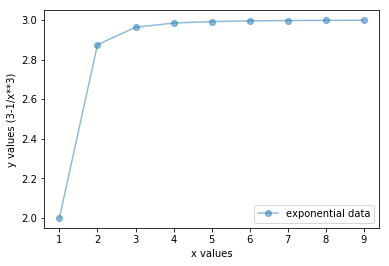

In [206]:
%matplotlib inline
from matplotlib.pyplot import plot,xlabel,ylabel,legend
from random import randint
from math import log

def simulate_y(x):
    return (3 - 1/x**3)

xs = list(range(1,10))
ys = []        
for x in xs:
    ys.append(simulate_y(x))

#Plot the result
plot(xs,ys,'o-',alpha=0.50,label="exponential data")
xlabel("x values")
ylabel("y values (3-1/x**3)")
legend()

In [207]:
#Now let's fit Pearson and Spearman regressions
from scipy.stats import spearmanr,pearsonr,linregress

pearson_r,p = pearsonr(xs,ys)
print("Pearson r = ",pearson_r)
print("Pearson p=",p)

spearman_rho,p = spearmanr(xs,ys)
print("Spearman r = ",spearman_rho)
print("Spearman p=",p)





Pearson r =  0.6191269478109577
Pearson p= 0.07542274289051659
Spearman r =  1.0
Spearman p= 0.0


Although we did not specify that the data were exponential specifically, we see a perfect (r = 1.0) Spearman regression, with a p value of 0.0. This is because the y variable is always monotonically increasing as x increases - which is exactly what Spearman regression is testing for. In contrast, Pearson regression assumes that we have a linear relationship between x and y. Data that are, in truth, exponential (and we know this because we simulated them) are fairly poorly explained by a linear regression. Indeed the linear regression is not statistically significant when applied to these data.



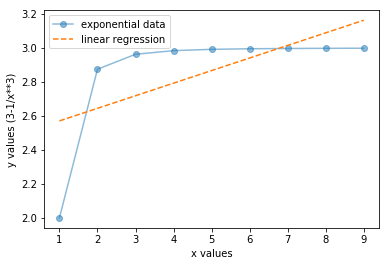

In [208]:
#Plot the result
plot(xs,ys,'o-',alpha=0.50,label="exponential data")
results = linregress(xs,ys)
plot(xs,[results.slope*x+results.intercept for x in xs],'--',label="linear regression")
xlabel("x values")
ylabel("y values (3-1/x**3)")
legend()

The flexibility of rank-based methods has allowed us to detect an exponential trend, even though our model (Spearman regression) didn't explicitly make any assumptions about the data being exponential. In contrast, Pearson regression got poor results because it tried to explain an exponential distribution with a straight line.

#### What exactly is the difference between Spearman and Pearson regression?

Having seen this difference in performance, we might be wondering how exactly these types of regression differ. It turns out that the *only* difference of significance is that Spearman correlation coverts all the x and y values into ranks (smallest y, next smallest y, etc) and then just does Pearson regression on the ranks. 

We can prove to ourselves (and any other skeptical friends) that these two things are really the same. Here's how: we'll calculate a Spearman regression, then convert the data to ranks and calculate a Pearson regression. If we're right, these should give exactly the same result. We can then plot the rank data to show what Spearman regression is 'seeing' when it finds a perfect correlation. 

In [209]:
from scipy.stats import rankdata

pearson_r,p = pearsonr(xs,ys)
print("Pearson r = ",pearson_r)
print("Pearson p=",p)

spearman_rho,p = spearmanr(xs,ys)
print("Spearman r = ",spearman_rho)
print("Spearman p=",p)

rank_ys = rankdata(ys)
rank_xs = rankdata(xs)
pearson_r,p = pearsonr(rank_xs,rank_ys)
print("Pearson r (calculated on ranks) = ",pearson_r)
print("Pearson p (calculated on ranks)=",p)





Pearson r =  0.6191269478109577
Pearson p= 0.07542274289051659
Spearman r =  1.0
Spearman p= 0.0
Pearson r (calculated on ranks) =  1.0
Pearson p (calculated on ranks)= 0.0


The above code demonstrates that simply converting our x and y data into ranks (with rank 1 being the smallest number) is sufficient to turn Pearson regression into Spearman regression, and therefore to let it to detect any increasing trend in the dataa, not just a linear one. 

> Spearman regression is just normal Pearson linear regression, but with the input x and y data converted into ranks. 
    
This was for me a very handy thing to realize - it mean that I didn't really have to learn two totally different approaches to regression, just an extremely simple trick that represents a different view into the data. The same is true of the statistical tests listed at the beginning of the chapter. In a single stroke, this halves the number of statistical tests we have to understand.

> We don't have to memorize dozens of tests, we just have to realize that for every 'standard' parametric statistical test, there is generally some sort of rank-based alternative that can accomodate non-linear trends, just like Spearman regression is the rank based version of Pearson regression.

#### Visualizing rank transformed data to understand what Spearman regression sees

As a final way to make sure we understand how this rank transform is working, let's try replotting our data once it has been converted into ranks. Once we do, it will likely be immediately obvious why Spearman regression sees a perfect linear correlation in our exponential data:

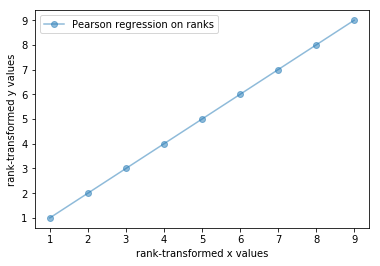

In [210]:
#Plot the result
plot(rank_xs,rank_ys,'o-',alpha=0.50,label="Pearson regression on ranks")
results = linregress(rank_xs,rank_ys)
xlabel("rank-transformed x values")
ylabel("rank-transformed y values")
legend()

If that's what Spearman regression sees, it's no wonder it finds a perfect trend!

### The flexibility of rank-based methods trades off with statistical power

So if rank-based methods are so flexible, why would we ever use a method like Pearson regression that makes strong assumptions about the data?

The answer lies in the notion of [statistical power](https://en.wikipedia.org/wiki/Power_of_a_test). Statistical power refers to one's chances of rejecting an untrue hypothesis given some set of data and some particular statistical test. So if you have more statistical power you are more likely to get statistically significant results if your null hypothesis is in fact incorrect. Thus, statistical power is the same idea as *statistical sensitivity* or the *true positive rate* when doing classification tasks, and is the opposite of the False Negative Rate or FNR (indeed in that context statistical power is 1 - FNR).

Informally, if we have more statistical power, we're less likely to miss a real pattern in our data. 

One major reason that Pearson regression is still widely used - even though Spearman regression is more flexible - is that *if* our data is actually linear, Pearson regression will have greater *statistical power* to detect the significance of that linear trend. 

Let's test this out by doing a new simulation. In this case, the data are definitely linear, but have a lot of noise. This causes each observed data point to vary from the y-value predicted from our linear regression by a random amount. We can simulate this random variance by adding a number drawn from a normal distribution to each y-value.



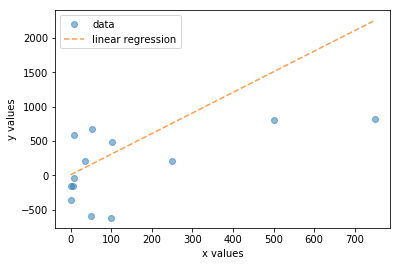

In [211]:
from scipy.stats import norm
from numpy import array

def simulate_noisy_linear_data(xs,slope=1,intercept=0,variance=18):
    """Return a list of x and y values for a noisy linear regression
    xs -- x values to calculate
    slope -- the slope (m) of the line in the equation y=mx+b
    intercept -- the intercept (b) of the line in the equation y=mx+b
    variance -- the variance of random deviations from the line    
    """  
    ys = []
    n_xs = len(xs)
    xs = array([float(x) for x in xs])
    ys = xs*slope + intercept
        
    noise_mean = 0.0 #the error distribution centers on 0 error
    random_distribution = norm(loc=noise_mean,scale=variance)
        
    noise = random_distribution.rvs(size = n_xs)
    ys += noise     
    return xs,ys

x_data = [0,1,5,7,8,35,51,53,100,101,250,500,750]
xs,ys = simulate_noisy_linear_data(xs= x_data,slope=3,intercept=7,variance=600)
plot(xs,ys,'o',alpha=0.5,label="data")
xs,true_ys = simulate_noisy_linear_data(xs= x_data,slope=3,intercept=7,variance=0)
plot(xs,true_ys,'--',alpha=0.75,label="linear regression")
xlabel("x values")
ylabel("y values")
legend()

In [212]:
#Now let's fit Pearson and Spearman regressions
from scipy.stats import spearmanr,pearsonr
spearman_rho,p = spearmanr(xs,ys)
print("Spearman r = ",spearman_rho)
print("Spearman p=",p)

pearson_r,p = pearsonr(xs,ys)
print("Pearson r = ",pearson_r)
print("Pearson p=",p)

Spearman r =  0.5549450549450549
Spearman p= 0.04900449559833098
Pearson r =  0.574394575075116
Pearson p= 0.04006154239129748


The exact result may vary each time you run the simulation, but in general the Pearson correlation will tend to be stronger (on average across many simulations) than the Spearman correlation. What should we take away from these results?

We showed earlier in this section that if, in truth, the trend is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function) (always either flat or headed in one direction) but **not** linear, then a Spearman regression has more power than a Pearson regression.

However, our second simulation shows that if a trend actually is linear, then Pearson correlation will have more power on average than Spearman correlation.

> Even though Spearman regression is more flexible than Pearson regression, Pearson regression has slightly more statistical power if the data are really linear
    

## Quantifying the difference in power between Spearman and Pearson regression using Monte Carlo

One major advantage of studying statistics after learning some coding techniques is that you can using simulations to explore the behavior of different statistical tests under circumstances you care about. Let's try this with Spearman and Pearson regression.

There are a variety of questions we could address by simulation: 

- How much do outliers impact the statistical power of Pearson and Spearman regression?
- How many samples do I need to detect a true significant trend with Spearman or Pearson regression, given either a linear or non-linear trend and at different levels of variance?
- If errors are **not** normally distributed, how often is the result of Pearson regression wrong?

We'll explore some of these more in the **Exercises**. For now let's focus on exploring further the statistical power of each of these methods. 

Running simulations for variance 20
Running simulations for variance 40
Running simulations for variance 80
Running simulations for variance 160


,Test,Variance,Sample Size,Statistical Power,Monte Carlo Trials
0,Pearson,20,40,0.956667,300
1,Spearman,20,40,0.933333,300
2,Pearson,20,60,1.000000,300
3,Spearman,20,60,1.000000,300
4,Pearson,20,80,1.000000,300
5,Spearman,20,80,1.000000,300
6,Pearson,20,100,1.000000,300
7,Spearman,20,100,1.000000,300
8,Pearson,40,40,0.456667,300
9,Spearman,40,40,0.436667,300


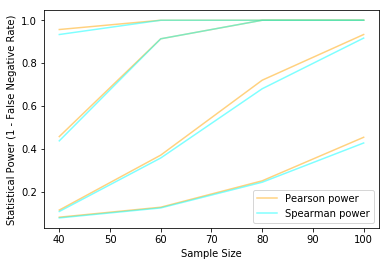

In [213]:
#Let's see how Spearman or Pearson regression perform 
#at regression on a linear dataset with a given variance and sample size
variances = [20,40,80,160]
sample_sizes = [40,60,80,100]
n_trials = 300
slope = 1
intercept = 3
results_columns = ["Test","Variance","Sample Size","Statistical Power","Monte Carlo Trials"]
results = []

for variance in variances:
    print(f"Running simulations for variance {variance}")
    pearson_results = []
    spearman_results = []
    for sample_size in sample_sizes:
        #Test how many of the trials 
        #reflect a positive result
        
        pearson_successes = 0
        spearman_successes = 0
        
        
        
        for trial in range(n_trials):
    
            xs,ys =\
              simulate_noisy_linear_data(xs = range(sample_size),slope=slope,\
                intercept=intercept,variance=variance)
            
            pearson_r,pearson_p = pearsonr(xs,ys)
            spearman_rho,spearman_p = spearmanr(xs,ys)
    
            if pearson_p < 0.05:
                pearson_successes += 1
                
            if spearman_p < 0.05:
                spearman_successes +=1
         
        
        pearson_label = f"{sample_size}_samples_variance_{variance}_Pearson"
        spearman_label = f"{sample_size}_samples_variance_{variance}_Spearman"
        
        pearson_power = pearson_successes/n_trials
        pearson_results.append(pearson_power)
        
        spearman_power = spearman_successes/n_trials  
        spearman_results.append(spearman_power)
        
        
        results.append(["Pearson",variance,sample_size,\
          pearson_power,n_trials])
        results.append(["Spearman",variance,sample_size,\
          spearman_power,n_trials])
        
    
    plot(sample_sizes,pearson_results,"-",color="orange",label=f"Pearson power",alpha=0.50)
    plot(sample_sizes,spearman_results,"-",color="cyan",label=f"Spearman power",alpha=0.50)
    
    #Only call legend on the first iteration of the loop
    if variance == variances[0]:
        legend()
    
xlabel("Sample Size")
ylabel("Statistical Power (1 - False Negative Rate)")
from pandas import DataFrame
df = DataFrame(results,columns=results_columns)
df
    

In the above results, the statistical power of Pearson regression (it's ability to reject the null hypothesis of no trend in noisy linear data) are plotted in orange for different variances, while the cyan lines represent the same for Spearman regression. As you can see, Pearson regression has *slightly* more power when its assumptions are met. (This is indicated by the orange line being sometimes a little bit higher than the cyan one).

## Exercises
1. The significance test for Pearson regression is testing the chances of getting an *apparent* slope as large or larger than the one you see under the null hypothesis that the slope was 0. Try adjusting the slope of the line. If you make it much larger, does statistical power increase or decrease?
1. Use the simulation to test whether adjusting the intercept of the true trend (i.e. the `intercept` parameter) has an effect on statistical power?  Once you get a result, try to interpret it.
1. Finally, try adjusting the variance in the data. Does greater variance increase or decrease statistical power?
1. You are studying a correlation between days since last feeding and body fat in pythons. If every day that the python didn't feed resulted in a loss of 1% body fat (a `slope` of -0.01), and the `variance` in body fat measurements was about 0.05, how many pythons do you think you'd have to measure in order to be pretty sure (say, with `statistical power` of at least 0.95) that you'd detect a significant association between these two parameters? Use the simulation to test this out. What about if you used Spearman correlation?
1. Modify the code for exponential regression to add an error term to each data point (like we did in the `simulate_noisy_linear_data` function. You might call it `simulate_noisy_exponential_data`.  Use your new function to test how Spearman and Pearson regression perform if the data are actually exponential instead of linear.
1. Pearson regression assumes a normal distribution of errors. Try changing the distribution that the errors come from to a unifrom (flat) distribution. You can do this by replacing the call to `norm` in the `simulate_noisy_linear_data` with the function `uniform` in scipy.stats. (You'll of course have to call `from scipy.statis import uniform`) before you call it.). How does this change impact the statistical power of Pearson vs. Spearman regression.

## Citations and Further Reading

[1] Derryberry, Shou, Connover ["Teaching Rank-Based Tests by Emphasizing Structural
Similarities to Corresponding Parametric Tests"](http://jse.amstat.org/v18n1/derryberry.pdf). *Journal of Statistics Education* Volume 18, Number 1 (2010)